## Revisando la Normalidad de los Datos

**Importar Librerias**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

**Cargar Base de Datos**

In [2]:
sima_df = pd.read_csv("dataset.csv")
sima_df.columns

Index(['Date', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5',
       'Atmospheric Pressure', 'Precipitation', 'Relative Humidity', 'SO2',
       'Solar Radiation', 'Temperature', 'Wind Speed', 'Wind Direction',
       'Nombre_Estacion', 'Clave_Estacion', 'Latitude', 'Longitude'],
      dtype='object')

In [5]:
num_sima_df = sima_df.drop(["Date","Nombre_Estacion","Clave_Estacion","Latitude","Longitude"], axis = 1)
num_sima_df.columns

Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'Atmospheric Pressure',
       'Precipitation', 'Relative Humidity', 'SO2', 'Solar Radiation',
       'Temperature', 'Wind Speed', 'Wind Direction'],
      dtype='object')

Dado que Shapiro-Wilk es para un maximo de 5000 observaciones se toma un muestreo aleatorio

In [7]:
sample_df = num_sima_df.sample(n=4999, random_state=42)

**Prueba Shapiro-Wilk**

In [22]:
for column in sample_df.columns:
    shapiro_test = stats.shapiro(sample_df[column])
    print(f"{column} p-value: {shapiro_test.pvalue}") 
    print(f"{column} statistic: {shapiro_test.statistic}") 
    if shapiro_test.pvalue < 0.05:
        print(f"{column} no se distribuye de forma normal\n")
    else:
        print(f"{column} si se distribuye de forma normal\n")

CO p-value: 7.667076679897936e-33
CO statistic: 0.9658597111701965
CO no se distribuye de forma normal

NO p-value: 0.0
NO statistic: 0.40226906538009644
NO no se distribuye de forma normal

NO2 p-value: 0.0
NO2 statistic: 0.8409133553504944
NO2 no se distribuye de forma normal

NOX p-value: 0.0
NOX statistic: 0.603907585144043
NOX no se distribuye de forma normal

O3 p-value: 0.0
O3 statistic: 0.9125363230705261
O3 no se distribuye de forma normal

PM10 p-value: 0.0
PM10 statistic: 0.6970677971839905
PM10 no se distribuye de forma normal

PM2.5 p-value: 0.0
PM2.5 statistic: 0.6368740200996399
PM2.5 no se distribuye de forma normal

Atmospheric Pressure p-value: 1.8899343353327713e-13
Atmospheric Pressure statistic: 0.9941200017929077
Atmospheric Pressure no se distribuye de forma normal

Precipitation p-value: 0.0
Precipitation statistic: 0.0134848952293396
Precipitation no se distribuye de forma normal

Relative Humidity p-value: 5.0122428491778877e-26
Relative Humidity statistic: 0.

**Box-Cox Transform**

In [23]:
for column in sample_df.columns:
    sample_df[column] += 0.0000000001 #Para prevenir vlaores 0
    transformed_column_name = f"{column}_bc"
    sample_df[transformed_column_name], lambda_value = stats.boxcox(sample_df[column])
    shapiro_test = stats.shapiro(sample_df[transformed_column_name])
    print(f"Post Box-Cox {column} p-value: {shapiro_test.pvalue}") 
    print(f"Post Box-Cox {column} statistic: {shapiro_test.statistic}") 
    if shapiro_test.pvalue < 0.05:
        print(f"Post Box-Cox {column} no se distribuye de forma normal\n")
    else:
        print(f"Post Box-Cox {column} si se distribuye de forma normal\n")

Post Box-Cox CO p-value: 8.228647624397567e-11
Post Box-Cox CO statistic: 0.9957826137542725
Post Box-Cox CO no se distribuye de forma normal

Post Box-Cox NO p-value: 3.8170628028368653e-26
Post Box-Cox NO statistic: 0.9797207117080688
Post Box-Cox NO no se distribuye de forma normal

Post Box-Cox NO2 p-value: 3.854239150058447e-09
Post Box-Cox NO2 statistic: 0.9966657161712646
Post Box-Cox NO2 no se distribuye de forma normal

Post Box-Cox NOX p-value: 0.008761357516050339
Post Box-Cox NOX statistic: 0.9990872144699097
Post Box-Cox NOX no se distribuye de forma normal

Post Box-Cox O3 p-value: 1.6002235344106386e-12
Post Box-Cox O3 statistic: 0.9947444796562195
Post Box-Cox O3 no se distribuye de forma normal

Post Box-Cox PM10 p-value: 5.517003931743382e-18
Post Box-Cox PM10 statistic: 0.9903517365455627
Post Box-Cox PM10 no se distribuye de forma normal

Post Box-Cox PM2.5 p-value: 8.371102266341741e-27
Post Box-Cox PM2.5 statistic: 0.9785919785499573
Post Box-Cox PM2.5 no se distr

C:\Users\mateo\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1877: RuntimeWarning: overflow encountered in cast
  a, w, pw, ifault = _statlib.swilk(y, a[:N//2], init)


ValueError: Data must be positive.

**Histograma**

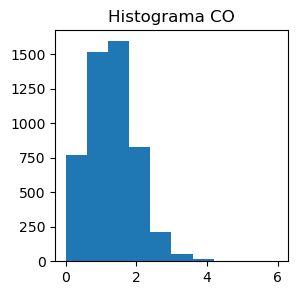

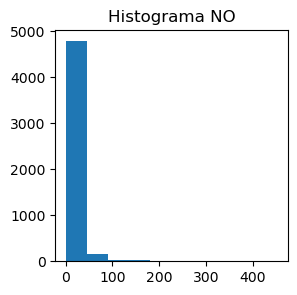

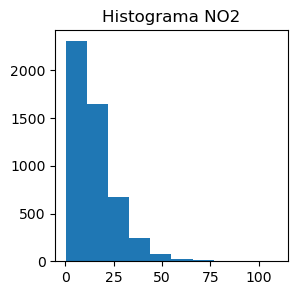

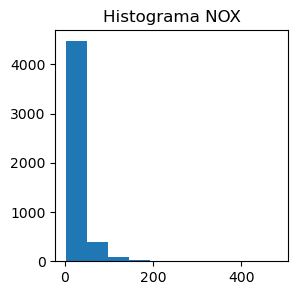

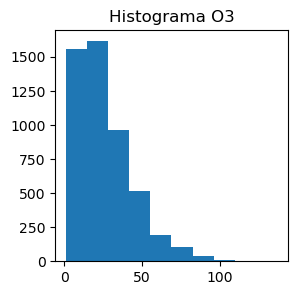

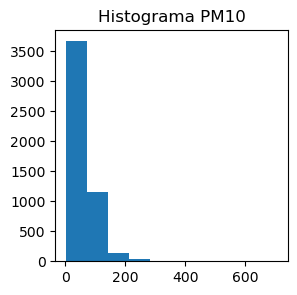

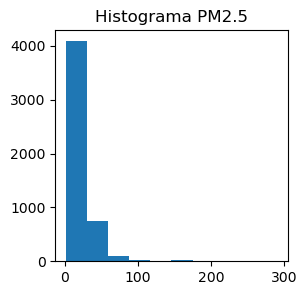

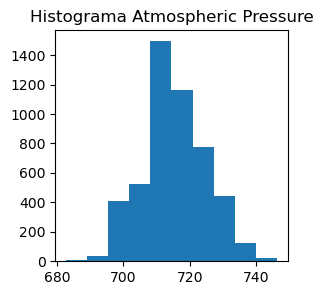

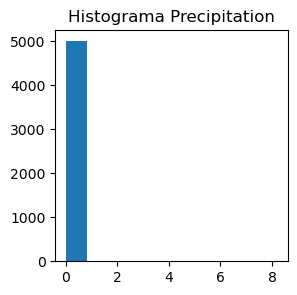

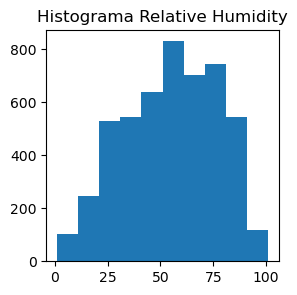

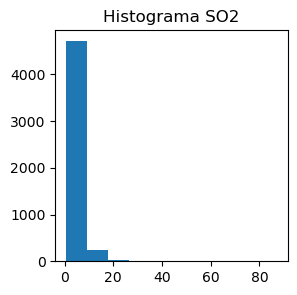

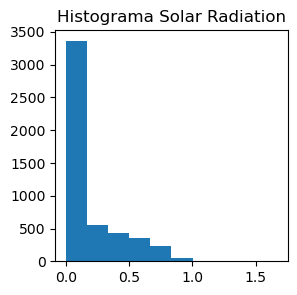

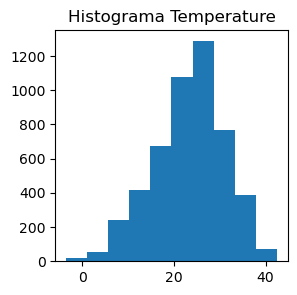

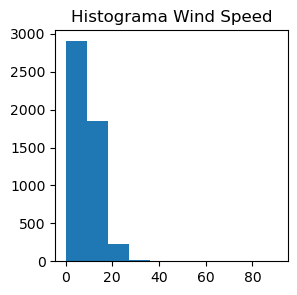

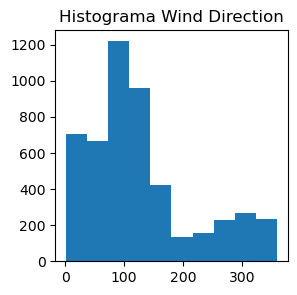

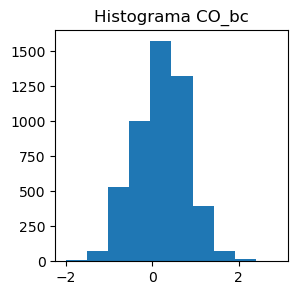

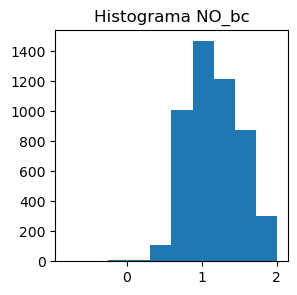

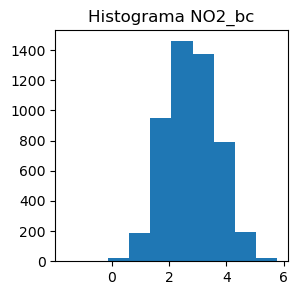

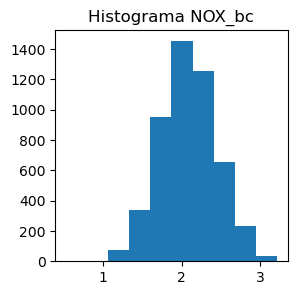

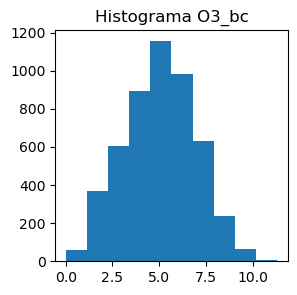

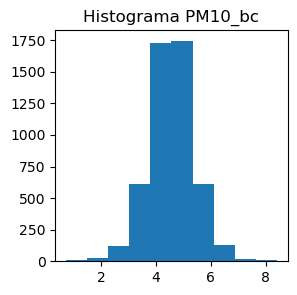

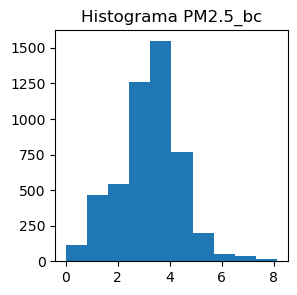

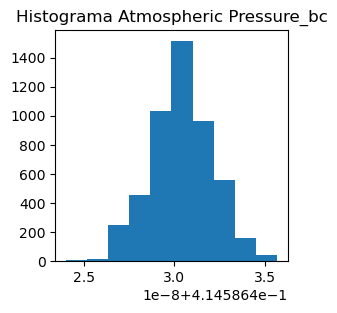

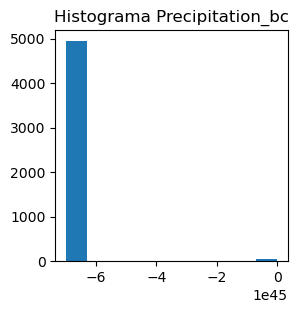

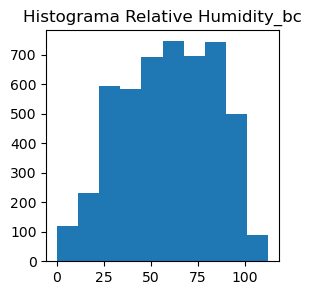

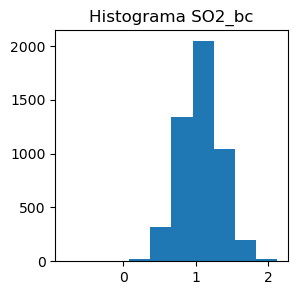

In [30]:
for column in sample_df.columns:
    plt.figure(figsize=(3,3))
    plt.hist(sample_df[column])
    plt.title(f"Histograma {column}")
    plt.show()